In [1]:
import numpy as np
import pandas as pd
#import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import add_stat_annotations
import scipy.stats as stats

In [3]:
# Now we look at the average mean expression level for different genomic locations 
bc_info = pd.read_csv('./all_CAS_pools_combined.tsv', sep = '\t')
bc_info = bc_info.loc[bc_info.id.str.contains('_LP1_latest')]

In [27]:
# Import the S phase proportion|
bc_phase = pd.read_csv('./220419_trip_phase.csv')
#bc_phase = bc_phase[['sg2m_prop', 'tBC']]

NameError: name 'bc_stem' is not defined

In [28]:
bc_info_phase = pd.merge(bc_info, bc_phase, on = 'tBC')
bc_info_phase = bc_info_phase.loc[bc_info_phase.tBC.isin(bc_info_stem.tBC)]

In [36]:
bc_info_phase.columns

Index(['tBC', 'mean', 'median', 'var', 'auc', 'mu', 'alpha', 'ncells', 'sum',
       'ncells_log10', 'MIN', 'twopower_MIN', 'fano', 'cv2', 'pool', 'mean_z',
       'var_z', 'fano_z', 'cv2_z', 'chr', 'location', 'strand', 'annotation',
       'id', 'Unnamed: 0', 'g1_prop', 's_prop', 'g2_prop', 'total_cells',
       'div_prop'],
      dtype='object')

In [29]:
bc_info_phase['div_prop'] = bc_info_phase['g1_prop'] + bc_info_phase['s_prop']

In [30]:
bc_info.columns

Index(['tBC', 'mean', 'median', 'var', 'auc', 'mu', 'alpha', 'ncells', 'sum',
       'ncells_log10', 'MIN', 'twopower_MIN', 'fano', 'cv2', 'pool', 'mean_z',
       'var_z', 'fano_z', 'cv2_z', 'chr', 'location', 'strand', 'annotation',
       'id'],
      dtype='object')

<AxesSubplot:xlabel='g2_prop', ylabel='ncells'>

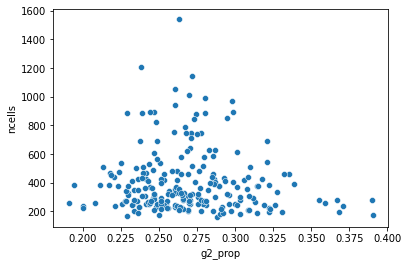

In [31]:
sns.scatterplot(x = 'g2_prop',  y = 'ncells', data = bc_info_phase)

<AxesSubplot:xlabel='g2_prop', ylabel='Count'>

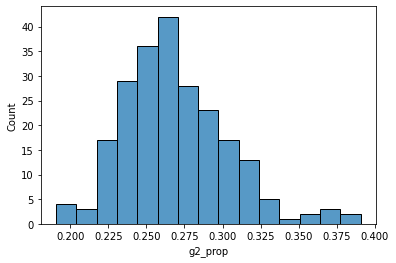

In [32]:
sns.histplot(x = 'g2_prop', data = bc_info_phase)

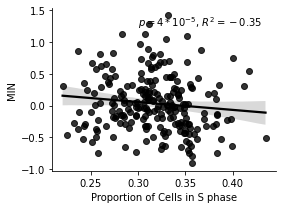

In [46]:
fig, ax = plt.subplots(figsize = (4,3))
sns.regplot(x = 's_prop', y = 'MIN', data = bc_info_phase, color = 'k')
#plt.xlim(0.2,0.5)
plt.xlabel('Proportion of Cells in S phase')
plt.text(0.3,1.25, r'$p = 4*10^{-5}$, $R^2 = -0.35$')
sns.despine()
#plt.savefig('220419_prop_s_phase_vs_MIN.pdf', dpi = 300)

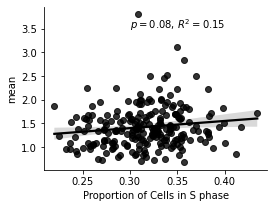

In [47]:
fig, ax = plt.subplots(figsize = (4,3))
sns.regplot(x = 's_prop', y = 'mean', data = bc_info_phase, color = 'k')
#plt.xlim(0.2,0.5)
plt.xlabel('Proportion of Cells in S phase')
plt.text(0.3,3.5, r'$p = 0.08$, $R^2 = 0.15$')
sns.despine()
#plt.savefig('220419_prop_s_phase_vs_mean.pdf', dpi = 300)

In [45]:
slope, intercept, r_value, p_value, std_err = stats.linregress(bc_info_phase['g2_prop'], bc_info_phase['MIN'])
print(f'the rvalue is {r_value}, and the pvalue is {p_value}')

the rvalue is 0.13484420242804668, and the pvalue is 0.04331755260528118


### Now we look at stemness subclusters

In [18]:
bc_phase = pd.read_csv('./220419_trip_stem.csv')

In [19]:
bc_info_stem = pd.merge(bc_info, bc_phase, on = 'tBC')

In [20]:
bc_info_stem.columns

Index(['tBC', 'mean', 'median', 'var', 'auc', 'mu', 'alpha', 'ncells', 'sum',
       'ncells_log10', 'MIN', 'twopower_MIN', 'fano', 'cv2', 'pool', 'mean_z',
       'var_z', 'fano_z', 'cv2_z', 'chr', 'location', 'strand', 'annotation',
       'id', 'Unnamed: 0', 'diff_prop', 'cd24_prop', 'total_cells'],
      dtype='object')

<AxesSubplot:xlabel='diff_prop', ylabel='mean'>

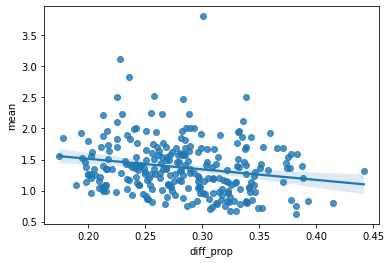

In [21]:
sns.regplot(x = 'diff_prop',  y = 'mean', data = bc_info_stem)

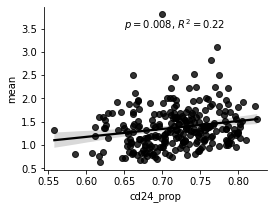

In [22]:
fig, ax = plt.subplots(figsize = (4,3))
sns.regplot(x = 'cd24_prop',  y = 'mean', data = bc_info_stem, color = 'k')
plt.text(0.65,3.5, r'$p = 0.008$, $R^2 = 0.22$')
sns.despine()
#plt.savefig('220419_prop_cd24_vs_mean.pdf', dpi = 300)

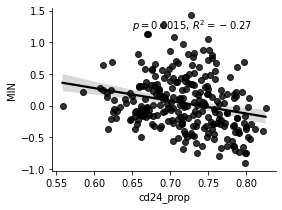

In [23]:
fig, ax = plt.subplots(figsize = (4,3))
sns.regplot(x = 'cd24_prop',  y = 'MIN', data = bc_info_stem, color = 'k')
plt.text(0.65,1.2, r'$p = 0.0015$, $R^2 = -0.27$')
sns.despine()
#plt.savefig('220419_prop_cd24_vs_MIN.pdf', dpi = 300)

In [24]:
slope, intercept, r_value, p_value, std_err = stats.linregress(bc_info_stem['cd24_prop'], bc_info_stem['MIN'])
print(f'the rvalue is {r_value}, and the pvalue is {p_value}')

the rvalue is -0.24272575145134692, and the pvalue is 6.538644857585367e-05
